### NaiveBayes and PCA using Iranian telecom dataset for Churn forecast 

Dataset: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Data Preparation

In [2]:
data= pd.read_csv('CustomerChurn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [3]:
print('Cases number:',data.shape[0])
print('\nNon-Churn :',data[data['Churn'] == 0].shape[0])
print('Churn:',data[data['Churn'] == 1].shape[0])
print('Non-Churn Proportion:',data[data['Churn'] == 0].shape[0]/data.shape[0])
print('Churn Proportion:',data[data['Churn'] == 1].shape[0]/data.shape[0])

Cases number: 3150

Non-Churn : 2655
Churn: 495
Non-Churn Proportion: 0.8428571428571429
Churn Proportion: 0.15714285714285714


In [4]:
labels= data['Churn'].values
data= data.iloc[:,:-1] 

#### Naive Bayes

Non-Churn test Proportion: 0.8428571428571429
Churn test Proportion: 0.15714285714285714
------------------------------------------------------
              precision    recall  f1-score   support

   Non-Churn       0.99      0.70      0.82       531
       Churn       0.38      0.97      0.55        99

    accuracy                           0.75       630
   macro avg       0.69      0.84      0.68       630
weighted avg       0.90      0.75      0.78       630



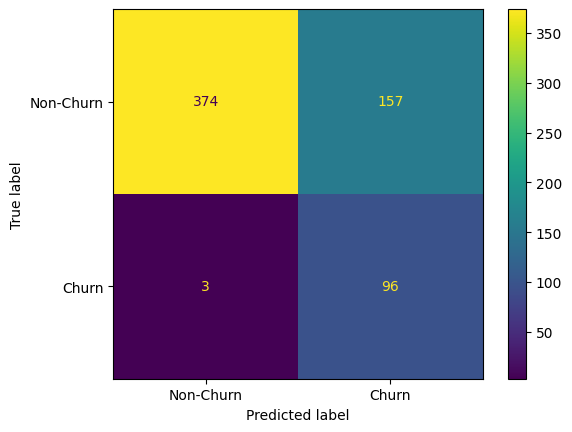

In [5]:
#Data splitting for training
X_train, X_test, y_train, y_test = train_test_split(
    data.values, labels, test_size = 0.20, stratify= labels, random_state=77
)

print('Non-Churn test Proportion:',1 - sum(y_test)/len(y_test))
print('Churn test Proportion:',sum(y_test)/len(y_test))
print('------------------------------------------------------')


#Estandarizamos los datos
scaler= StandardScaler()
norm_X_train= scaler.fit_transform(X_train) 
norm_X_test= scaler.transform(X_test) 

#Prediction
model= GaussianNB()
model.fit(norm_X_train, y_train)
y_pred= model.predict(norm_X_test)

#Results
print(classification_report(y_test, y_pred, target_names=['Non-Churn','Churn']))
cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churn','Churn'])
disp.plot()

#### PCA + Naive Bayes

In [6]:
#dimension reduction first 10 components
pca= PCA(n_components=10)
X_train= pca.fit_transform(norm_X_train)
X_test= pca.transform(norm_X_test)

print(f"PCA explained variance ratio (first ten components): {pca.explained_variance_ratio_}")

PCA explained variance ratio (first ten components): [0.30665437 0.18003081 0.12518322 0.09459871 0.0918556  0.06343691
 0.044861   0.03726326 0.0295133  0.02067327]


In [7]:
for c in range(3,9):
    X_trainc= X_train[:,:c]
    X_testc= X_test[:,:c]
    #Prediction
    model.fit(X_trainc, y_train)
    y_pred= model.predict(X_testc)

    #Results
    print(f"---------------- nº of components: {c} ----------------")
    print(classification_report(y_test, y_pred, target_names=['Non-Churn','Churn']))
    print("\n")

---------------- nº of components: 3 ----------------
              precision    recall  f1-score   support

   Non-Churn       0.94      0.88      0.91       531
       Churn       0.51      0.71      0.60        99

    accuracy                           0.85       630
   macro avg       0.73      0.79      0.75       630
weighted avg       0.87      0.85      0.86       630



---------------- nº of components: 4 ----------------
              precision    recall  f1-score   support

   Non-Churn       0.92      0.88      0.90       531
       Churn       0.49      0.62      0.55        99

    accuracy                           0.84       630
   macro avg       0.71      0.75      0.72       630
weighted avg       0.86      0.84      0.85       630



---------------- nº of components: 5 ----------------
              precision    recall  f1-score   support

   Non-Churn       0.91      0.94      0.92       531
       Churn       0.60      0.51      0.55        99

    accuracy    